## References

1. [How to Create Any Image Using Only Sine Functions | 2D Fourier Transform in Python](https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/)
2. numpy: https://numpy.org/doc/stable/reference/routines.fft.html

# Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

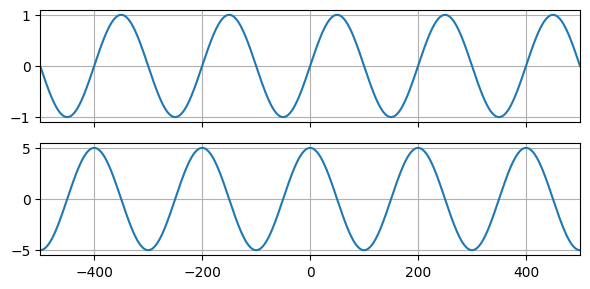

the shape of x: (1001,)


In [2]:
def _plot_sinusoids():
    #plt.figure(figsize=(6, 2))
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 3), sharex=True)
    
    x = np.arange(-500, 501, 1)
    amplitude = 1.0
    wavelength = 200.0
    offset = 0
    y = amplitude * np.sin((2 * np.pi * x / wavelength) + offset)
    
    ax1.plot(x, y)
    ax1.grid()
    #ax1.xlim(np.min(x), np.max(x))
    
    x = np.arange(-500, 501, 1)
    amplitude = 5.0
    wavelength = 200.0
    offset = np.pi / 2
    y = amplitude * np.sin((2 * np.pi * x / wavelength) + offset)
    
    ax2.plot(x, y)
    ax2.grid()
    
    ax2.set_xlim(np.min(x), np.max(x))
    
    plt.tight_layout()
    plt.show()

    print(f'the shape of x: {x.shape}')

_plot_sinusoids()

Shape of first grating: (1001, 1001)


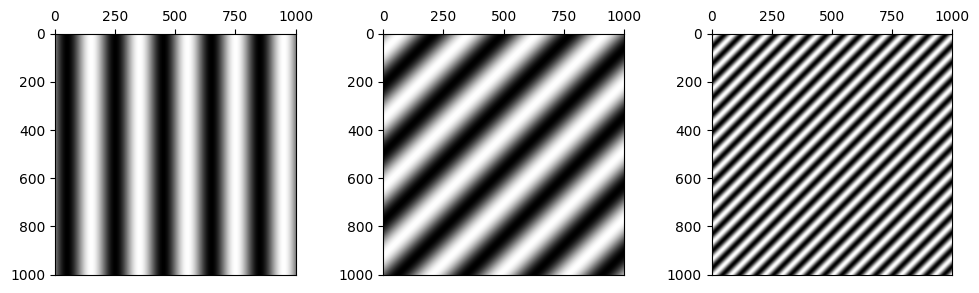

In [3]:
def _plot_gratings():
    
    plt.figure(figsize=(10, 3))
    
    #############
    # GRATING 1 #
    #############
    _x = np.arange(-500, 501, 1)
    X, Y = np.meshgrid(_x, _x)
    grating = 1.0 * np.sin((2 * np.pi * X / 200) + (0*np.pi))
    print(f'Shape of first grating: {X.shape}')
    
    plt.subplot(131)
    plt.imshow(grating, cmap='gray')
    plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
    
    #############
    # GRATING 2 #
    #############
    width = 1001
    height = 1001
    wavelength = 200
    angle = np.deg2rad(45)
    
    X, Y = np.meshgrid(np.arange(width), np.arange(height))
    grating = np.sin(
        2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / wavelength
    )
    
    plt.subplot(132)
    plt.imshow(grating, cmap='gray')
    plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
    
    
    #############
    # GRATING 3 #
    #############
    width = 1001
    height = 1001
    wavelength = 50
    angle = np.deg2rad(45)
    
    X, Y = np.meshgrid(np.arange(width), np.arange(height))
    grating = np.sin(
        2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / wavelength
    )
    
    plt.subplot(133)
    plt.imshow(grating, cmap='gray')
    plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
    
    
    plt.tight_layout()
    plt.show()

_plot_gratings()

# 1D FT

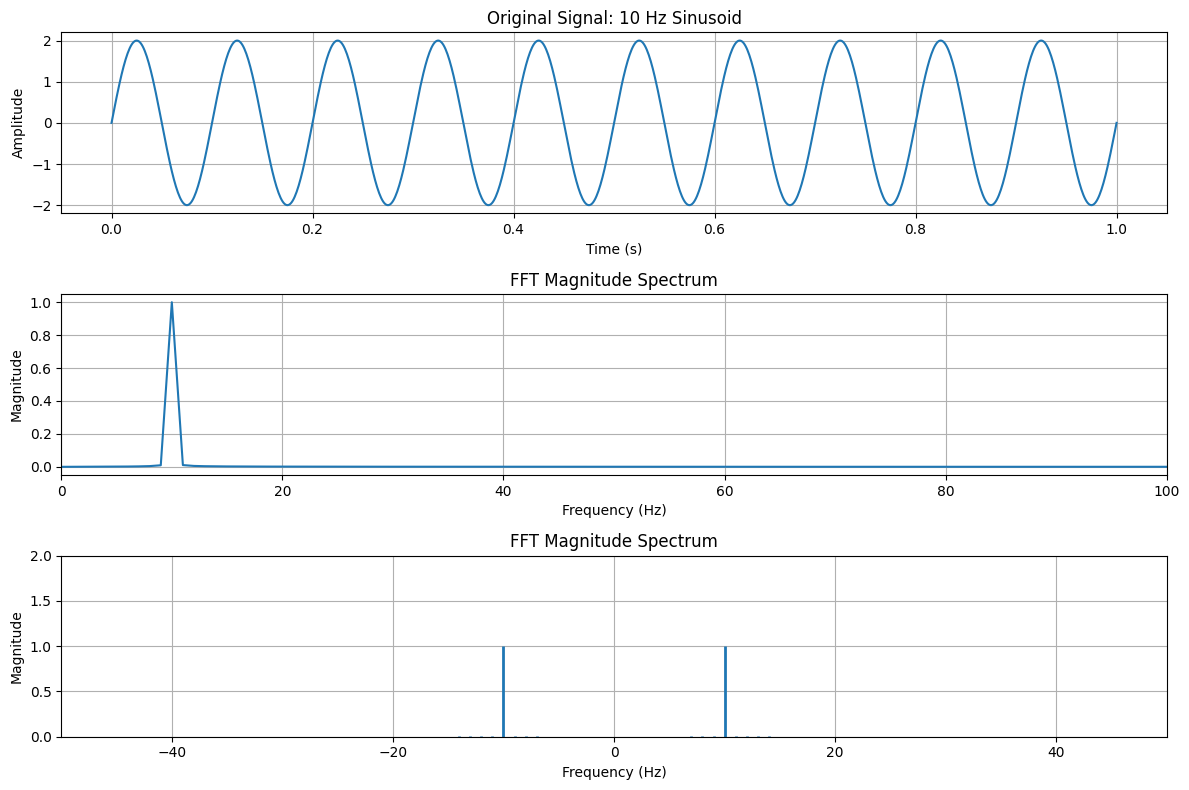

In [4]:
def _1d_signal_fft():
    """
    The code generates a 10 Hz sinusoid and computes its FFT.
    
    We create a 1-second signal sampled at 1000 Hz (sample_rate).
    The signal is a pure sine wave at 10 Hz.
    """
    # Signal parameters.
    duration = 1.0  # Duration of signal in seconds.
    sample_rate = 1000  # Number of samples per second.
    freq = 10  # Frequency of our sinusoid in Hz.
    
    # Generate time array.
    t = np.linspace(0, duration, int(sample_rate * duration))
    
    # Create a `freq` Hz sine wave.
    signal = 2 * np.sin(2 * np.pi * freq * t)
    
    # Compute the FFT.
    # fft returns complex numbers, so we take the absolute value to get magnitudes.
    fft_result = np.fft.fft(signal)
    fft_magnitude = np.abs(fft_result)

    # Get the corresponding frequencies for plotting
    # fftfreq returns the frequencies corresponding to the FFT bins
    frequencies = np.fft.fftfreq(len(t), 1/sample_rate)
    
    # Create a figure with two subplots
    plt.figure(figsize=(12, 8))
    
    # Plot the original signal
    plt.subplot(3, 1, 1)
    plt.plot(t, signal)
    plt.title(f'Original Signal: {freq} Hz Sinusoid')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Plot the FFT magnitude spectrum
    # We'll only show the positive frequencies up to sample_rate/2 (Nyquist frequency)
    plt.subplot(3, 1, 2)
    # Only plot the positive frequencies (up to len(frequencies)//2)
    positive_freq_mask = frequencies >= 0
    plt.plot(frequencies[positive_freq_mask], fft_magnitude[positive_freq_mask]/t.size)
    plt.title('FFT Magnitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(0, 100)  # Limit x-axis to better see the peak


    # Plot the FFT magnitude spectrum using stem
    plt.subplot(3, 1, 3)
    plt.vlines(
        frequencies, 
        ymin=0, 
        ymax=fft_magnitude/t.size,
        linewidth=2,
    )
    
    plt.title('FFT Magnitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(-50, 50)
    plt.ylim(0, 2)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

_1d_signal_fft()

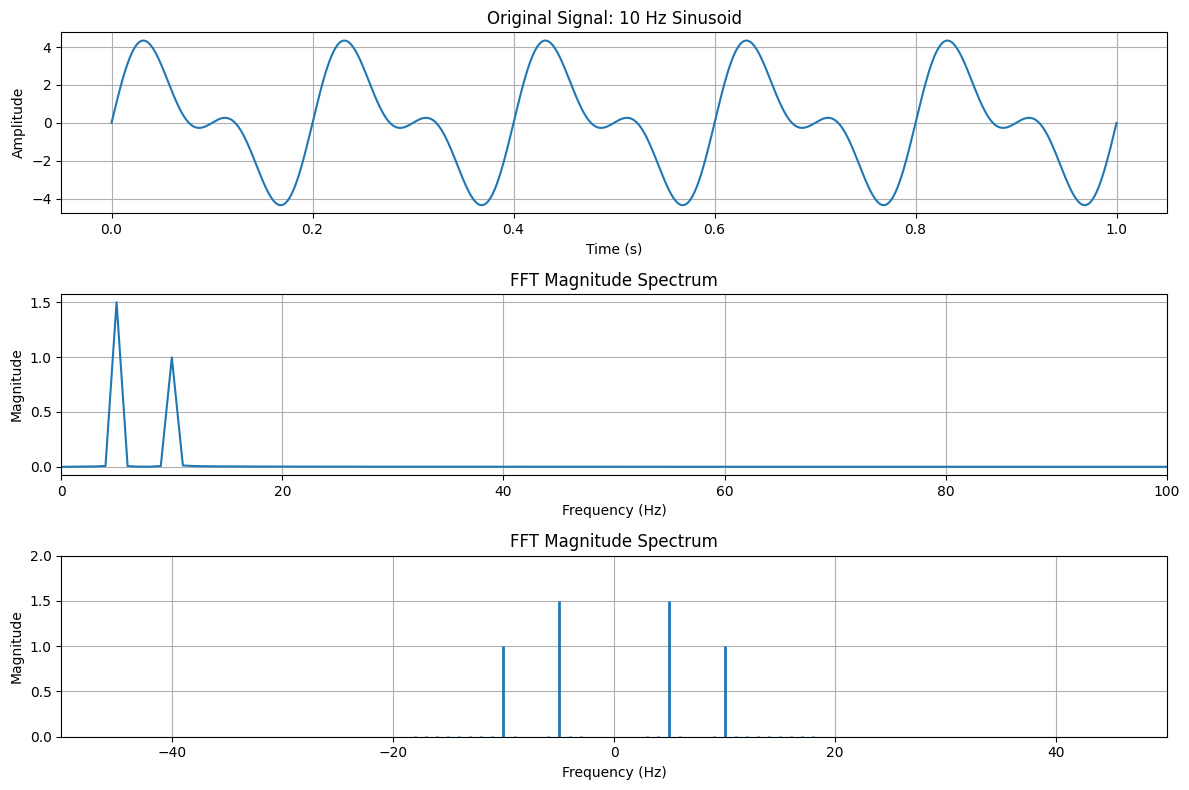

In [5]:
def _1d_signal_many_sinusoids():
    """
    The code generates a 10 Hz sinusoid and computes its FFT.
    
    We create a 1-second signal sampled at 1000 Hz (sample_rate).
    The signal is a pure sine wave at 10 Hz.
    """
    # Signal parameters.
    duration = 1.0  # Duration of signal in seconds.
    sample_rate = 1000  # Number of samples per second.
    freq = 10  # Frequency of our sinusoid in Hz.
    
    # Generate time array.
    t = np.linspace(0, duration, int(sample_rate * duration))
    
    # Create a `freq` Hz sine wave.
    signal = 2 * np.sin(2 * np.pi * freq * t) + 3 * np.sin(2 * np.pi * 5 * t)
    
    # Compute the FFT.
    # fft returns complex numbers, so we take the absolute value to get magnitudes.
    fft_result = np.fft.fft(signal)
    fft_magnitude = np.abs(fft_result)

    # Get the corresponding frequencies for plotting
    # fftfreq returns the frequencies corresponding to the FFT bins
    frequencies = np.fft.fftfreq(len(t), 1/sample_rate)
    
    # Create a figure with two subplots
    plt.figure(figsize=(12, 8))
    
    # Plot the original signal
    plt.subplot(3, 1, 1)
    plt.plot(t, signal)
    plt.title(f'Original Signal: {freq} Hz Sinusoid')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Plot the FFT magnitude spectrum
    # We'll only show the positive frequencies up to sample_rate/2 (Nyquist frequency)
    plt.subplot(3, 1, 2)
    # Only plot the positive frequencies (up to len(frequencies)//2)
    positive_freq_mask = frequencies >= 0
    plt.plot(frequencies[positive_freq_mask], fft_magnitude[positive_freq_mask]/t.size)
    plt.title('FFT Magnitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(0, 100)  # Limit x-axis to better see the peak


    plt.subplot(3, 1, 3)
    plt.vlines(
        frequencies, 
        ymin=0, 
        ymax=fft_magnitude/t.size,
        linewidth=2,
    )
    
    plt.title('FFT Magnitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(-50, 50)
    plt.ylim(0, 2)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

    return fft_magnitude, t

fft_magnitude, t = _1d_signal_many_sinusoids()

In [6]:
# To find the amplitude of the sinusoids that make up the signal,
# make a mask where you identify the abs values normalized
# look for non-zero values.
# The normalized magnitudes will correspond to half the amplitude for each sinusoid.
norm_fft_magnitudes = fft_magnitude / t.size
_mask = norm_fft_magnitudes > 0.1
norm_fft_magnitudes[_mask]

array([1.50051845, 0.99733118, 0.99733118, 1.50051845])

In [7]:
# To find the indices corresponding to the frequencies that make up the sinusoids, 
# first find in the normalized magnitudes the non-zero values - like above.
# but this time we are not interested in the values at those places but on their indices.
np.where(norm_fft_magnitudes > 0.1)[0]  # [0] because np.where returns a tuple

array([  5,  10, 990, 995])

In [8]:
# Next, get the Discrete Fourier Transform sample frequencies.
# These frequencies MUST match our smapling rate in order to get the correct frequencies
# using the indices from the normalized magnitudes.
"""
When you use 1/sample_rate (1/1000).
The frequencies match your actual signal frequencies:

1. The frequencies are scaled correctly to Hz
1. For a 1000-point FFT with 1/1000 second spacing, you get:

0 to 499 Hz (positive frequencies)
-500 to -1 Hz (negative frequencies)

This makes sense because your Nyquist frequency (max frequency you can detect) is sample_rate/2 = 500 Hz.

When you use 1 as the sample spacing, you're essentially saying each sample is 1 second apart.
So your frequencies become:

0 to 0.499 Hz (positive)
-0.5 to -0.001 Hz (negative)
"""
_frequencies = np.fft.fftfreq(len(t), 1/1000)
_frequencies.shape #, _frequencies

(1000,)

In [9]:
# Now, feed the indices into the frequencies list to obtain the frequencies of our signal.
_frequencies[5], _frequencies[10], _frequencies[ np.where(norm_fft_magnitudes > 0.1)[0] ] 

(np.float64(5.0), np.float64(10.0), array([  5.,  10., -10.,  -5.]))

# 2D FFT

In [10]:
# We will use the shift functions to place the zero of our frequency ranges in the center of the image.
# This is convention for visualization.
_input = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

_input, np.fft.ifftshift(_input), np.fft.fftshift(_input)

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[5, 6, 4],
        [8, 9, 7],
        [2, 3, 1]]),
 array([[9, 7, 8],
        [3, 1, 2],
        [6, 4, 5]]))

In [11]:
_X, _Y = np.meshgrid(np.arange(3), np.arange(3))

_X, _Y, np.fft.ifftshift(_X), np.fft.fftshift(_X)

(array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 array([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]]),
 array([[1, 2, 0],
        [1, 2, 0],
        [1, 2, 0]]),
 array([[2, 0, 1],
        [2, 0, 1],
        [2, 0, 1]]))

In [12]:
_X, _ = np.meshgrid(np.arange(-3, 4, 1), np.arange(-3, 4, 1))

_X, np.fft.ifftshift(_X), np.fft.fftshift(_X)

(array([[-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3]]),
 array([[ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1]]),
 array([[ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0]]))

In [13]:
_X, _ = np.meshgrid(np.arange(0, 4, 1), np.arange(0, 4, 1))

_X, np.fft.ifftshift(_X), np.fft.fftshift(_X)

(array([[0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3]]),
 array([[2, 3, 0, 1],
        [2, 3, 0, 1],
        [2, 3, 0, 1],
        [2, 3, 0, 1]]),
 array([[2, 3, 0, 1],
        [2, 3, 0, 1],
        [2, 3, 0, 1],
        [2, 3, 0, 1]]))

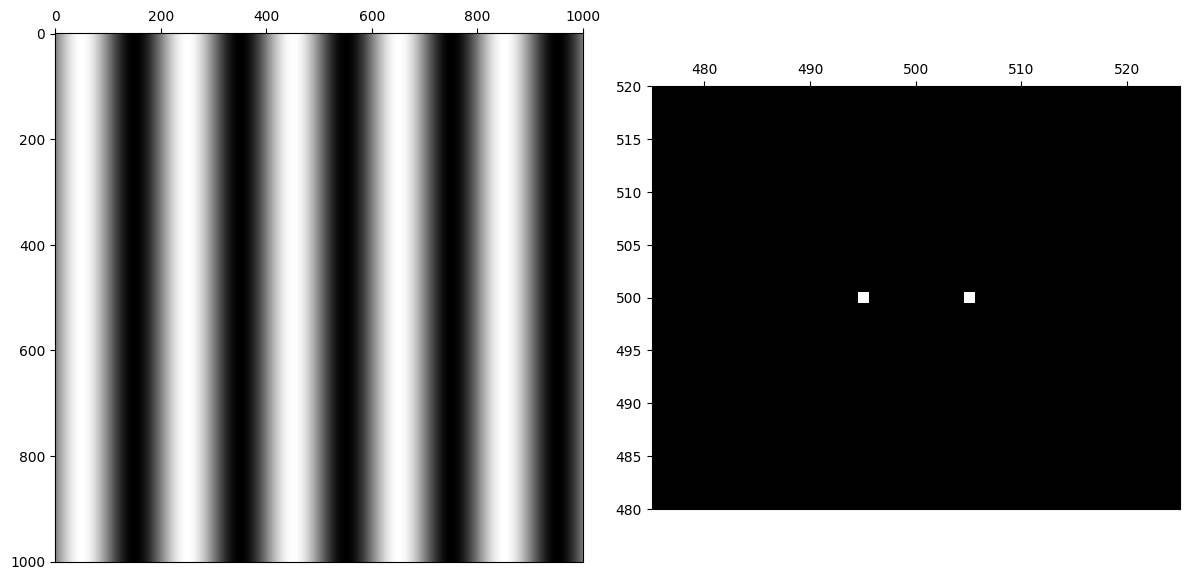

In [14]:
width = 1001
height = 1001
wavelength = 200
angle = np.deg2rad(0)

X, Y = np.meshgrid(np.arange(width), np.arange(height))
grating = np.sin(
    (2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / wavelength)
    + 0
)

# Since the mesh ranges from 0 to width, we only need one shift to have the zero at the center.
ft = np.fft.fft2(grating)
ft = np.fft.fftshift(ft)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 13))

ax1.imshow(grating, cmap='gray')
ax1.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)

ax2.imshow(np.abs(ft), cmap='gray')
ax2.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
ax2.set_xlim([475, 525])
ax2.set_ylim([480, 520])
#ax2.set_xlim([-10, 8])
#ax2.set_ylim([-10, 8])

plt.tight_layout()
plt.show()

In [15]:
np.unravel_index(np.argmax(abs(ft)), ft.shape)

(np.int64(500), np.int64(495))

In [16]:
abs(ft[500, 495])

np.float64(500729.49154169904)

In [17]:
abs(ft[500, 505])

np.float64(500729.49154169904)

In [18]:
X.shape

(1001, 1001)

In [19]:
# This scaling happens because the FFT preserves the total energy in the signal, distributed across all frequencies.
abs(ft[500, 495]) / (width * height)  # Should be close to 0.5

np.float64(0.4997295327466729)

In [20]:
"""
With a wavelength of 200 pixels, your pattern repeats every 200 pixels.

In the frequency domain, we're measuring how many complete cycles fit within our image width.
"""
peak_distance = width / wavelength  # ≈ 5 pixels from center
center = width // 2  # 500

peak_distance, center

(5.005, 500)

shape of mesh: (1001, 1001), (1001, 1001)


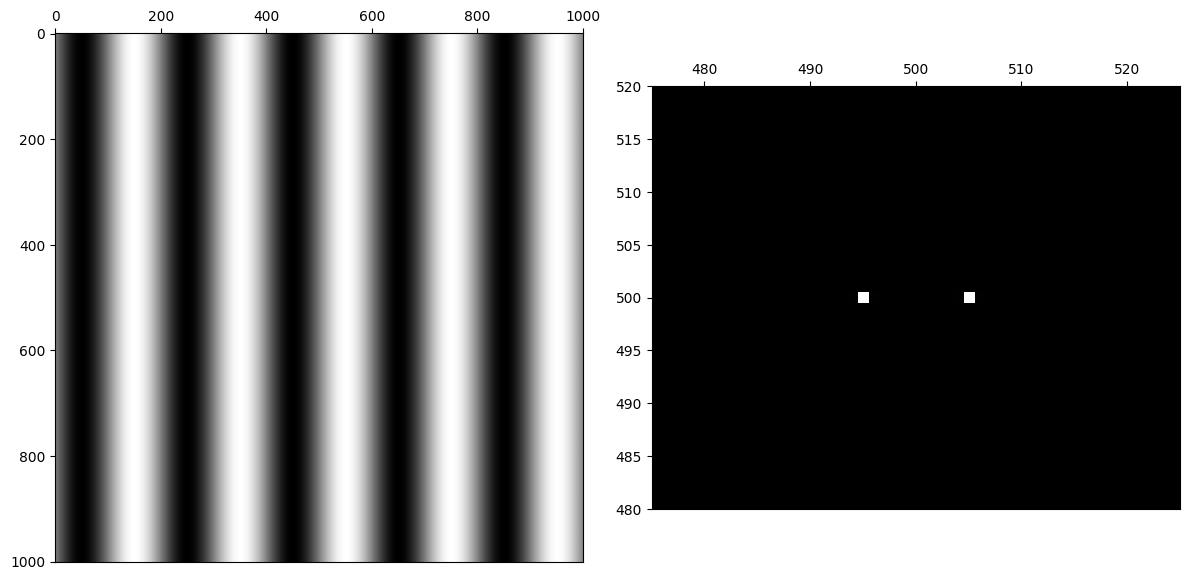

In [21]:
#width = 1001
#height = 1001
wavelength = 200
angle = np.deg2rad(0)

_x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(_x, _x)
grating = 5.0 * np.sin(
    (2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / wavelength)
    + (0*np.pi)
)
print(f'shape of mesh: {X.shape}, {Y.shape}')

# Since the mesh ranges from - somenumber to + somenumber,
# we need to do a quadrant shift that will put the zeros on the top-left side (ifftshift) first.
# Then, we do the normal shift after the fft.
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 13))

ax1.imshow(grating, cmap='gray')
ax1.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)

ax2.imshow(np.abs(ft), cmap='gray')
ax2.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
ax2.set_xlim([475, 525])
ax2.set_ylim([480, 520])
#ax2.set_xlim([-10, 8])
#ax2.set_ylim([-10, 8])

plt.tight_layout()
plt.show()

By default, the FFT algorithm (specifically numpy's fft2) assumes:
- The origin (zero frequency) is at the top-left corner
- Positive frequencies increase going right/down until halfway
- Then negative frequencies continue from halfway to the end

But when visualizing frequency data, we usually want:
- The zero frequency (DC component) in the center
- Low frequencies near the center
- High frequencies (both positive and negative) at the edges

```python
X, Y = np.meshgrid(np.arange(width), np.arange(height))
```

Here your input data already has its "zero" at the top-left corner, matching FFT's natural organization.
So you only need fftshift after the FFT to center the output for visualization.

```python
_x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(_x, _x)
```

Here your input data has its "zero" in the center. You need to:

1. First use ifftshift to move the zero to the top-left (where FFT expects it)
1. Do the FFT
1. Then use fftshift to center the output for visualization

The reason this isn't just convention is that the FFT algorithm is actually computing a discrete sum of complex exponentials, and it needs to know where "zero" is to properly compute the phase relationships. The shifts ensure these phase relationships are calculated correctly!

In [22]:
_x.shape, X.shape, Y.shape

((1001,), (1001, 1001), (1001, 1001))

In [23]:
# Get frequency arrays for both dimensions
freq_x = np.fft.fftfreq(_x.size, 1)
freq_y = np.fft.fftfreq(_x.size, 1)

# Since we fftshifted our FFT data, shift frequencies too
freq_x = np.fft.fftshift(freq_x)
freq_y = np.fft.fftshift(freq_y)

In [24]:
norm_fft_magnitudes = np.abs(ft) / np.square(_x.size)

_threshold = 0.1
peak_mask = norm_fft_magnitudes > _threshold
peak_indices = np.where(peak_mask)

In [25]:
# Amplitudes:
norm_fft_magnitudes[peak_indices]

array([2.49864766, 2.49864766])

In [26]:
peak_indices, peak_indices[0]

((array([500, 500]), array([495, 505])), array([500, 500]))

In [27]:
# Frequency is 1/\lambda.
1/wavelength

0.005

In [28]:
freq_x[peak_indices[1]], freq_y[peak_indices[0]]

(array([-0.004995,  0.004995]), array([0., 0.]))

shape of mesh: (1001, 1001), (1001, 1001)


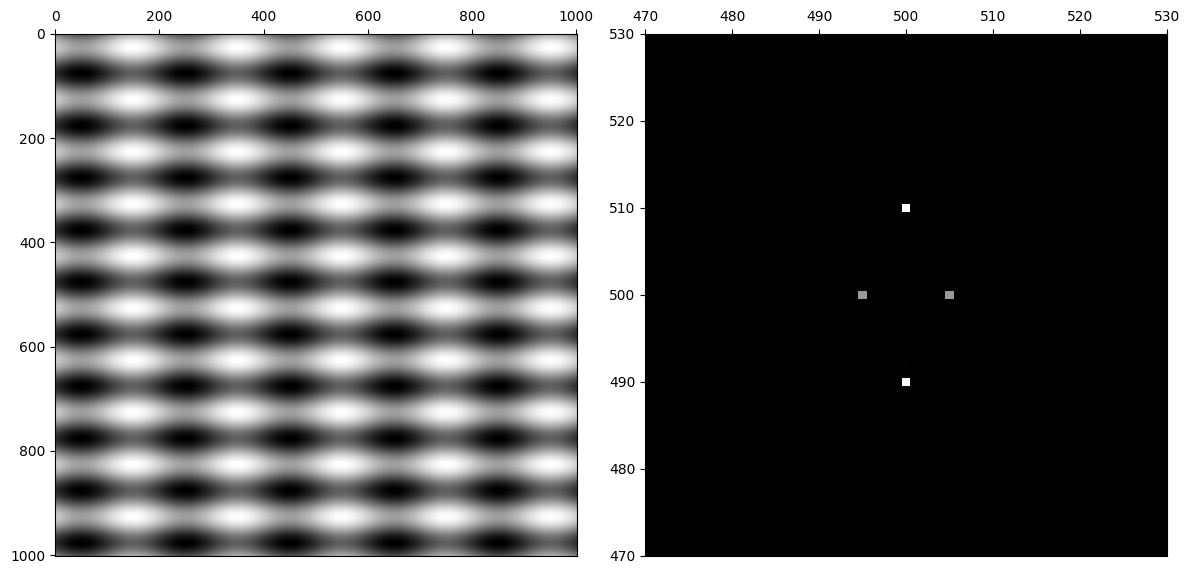

In [29]:
#width = 1001
#height = 1001
wavelength = 200
angle = np.deg2rad(0)

_x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(_x, _x)
grating = 30 * np.sin(
    (2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / wavelength)
    + (0*np.pi)
) + 50 * np.sin(
    (2 * np.pi * (X * np.cos(np.deg2rad(90)) + Y * np.sin(np.deg2rad(90))) / 100)
    + (0*np.pi)
)
print(f'shape of mesh: {X.shape}, {Y.shape}')

# Since the mesh ranges from - somenumber to + somenumber,
# we need to do a quadrant shift that will put the zeros on the top-left side (ifftshift) first.
# Then, we do the normal shift after the fft.
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 13))

ax1.imshow(grating, cmap='gray')
ax1.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)

ax2.imshow(np.abs(ft), cmap='gray')
ax2.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
ax2.set_xlim([470, 530])
ax2.set_ylim([470, 530])
#ax2.set_xlim([-10, 8])
#ax2.set_ylim([-10, 8])

plt.tight_layout()
plt.show()

In [30]:
norm_fft_magnitudes = np.abs(ft) / np.square(_x.size)

_threshold = 1
peak_mask = norm_fft_magnitudes > _threshold
peak_indices = np.where(peak_mask)
peak_indices

(array([490, 500, 500, 510]), array([500, 495, 505, 500]))

In [31]:
# Amplitudes:
norm_fft_magnitudes[peak_indices]

array([24.98338796, 14.99188598, 14.99188598, 24.98338796])

In [32]:
# Get frequency arrays for both dimensions
freq_x = np.fft.fftfreq(_x.size, 1)
freq_y = np.fft.fftfreq(_x.size, 1)

# Since we fftshifted our FFT data, shift frequencies too
freq_x = np.fft.fftshift(freq_x)
freq_y = np.fft.fftshift(freq_y)

In [33]:
freq_x[peak_indices[1]], freq_y[peak_indices[0]]

(array([ 0.      , -0.004995,  0.004995,  0.      ]),
 array([-0.00999001,  0.        ,  0.        ,  0.00999001]))

In [34]:
1/200, 1/100

(0.005, 0.01)

# FFT on Images

In [2]:
import cv2 as cv
from dataclasses import dataclass
from pathlib import Path
import requests
from tqdm.notebook import tqdm

@dataclass
class ImageInfo:
    image_path: Path
    url: str
    img: cv.Mat|None = None

    def download(self) -> cv.Mat:
        headers = {'User-Agent': 'ComputerVisionExperiments/0.0 (https://github.com/seafoodfry/ml-workspace/tree/main/gpu-sandbox/vision)'}
        response = requests.get(self.url, headers=headers)
        response.raise_for_status()

        img_data = response.content
        with open(self.image_path, 'wb') as f:
            f.write(img_data)
    
        # Opencv reads images in BGR.
        self.img = cv.imread(self.image_path, cv.IMREAD_UNCHANGED)

    def rgb(self) -> cv.Mat:
        return cv.cvtColor(self.img, cv.COLOR_BGR2RGB)

    def gray(self) -> cv.Mat:
        return cv.cvtColor(self.img, cv.COLOR_BGR2GRAY)


class ImageCache:
    def __init__(self, base_path: str = './img/006-images'):
        self._base_path = Path(base_path)
        self._base_path.mkdir(parents=True, exist_ok=True)
        
        self._cache: dict[str, ImageInfo] = {
            'mountains': ImageInfo( # https://www.europeanguanxi.com/post/all-you-need-to-know-about-chinese-traditional-painting
                image_path=self._base_path / 'mountain.jpg',
                url='https://static.wixstatic.com/media/6f1822_68501e398a834591b23c295fda2c7d97~mv2.jpeg/v1/fill/w_1279,h_800,al_c,q_85,enc_auto/6f1822_68501e398a834591b23c295fda2c7d97~mv2.jpeg',
            )
        }
        for img_key, img in tqdm(self._cache.items(), desc="Downloading images"):
            img.download()

    def images(self):
        """Return all the image names registered."""
        return self._cache.keys()

    def __getitem__(self, img_name: str) -> ImageInfo:
        """Allow dictionary-like access to loaded images."""
        if img_name not in self._cache:
            self.load_img(img_name)
        return self._cache[img_name]

    def cwd(self):
        return self._base_path


CACHE = ImageCache()

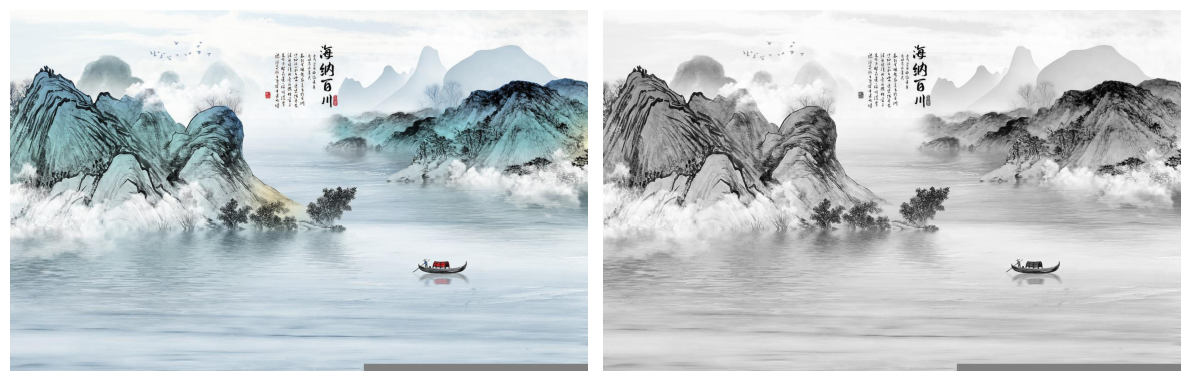

In [3]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(CACHE['mountains'].rgb())
plt.axis('off')

plt.subplot(122)
plt.imshow(CACHE['mountains'].gray(), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
CACHE['mountains'].img.shape

(800, 1279, 3)

In [5]:
CACHE['mountains'].img[:799, :799, :].shape

(799, 799, 3)

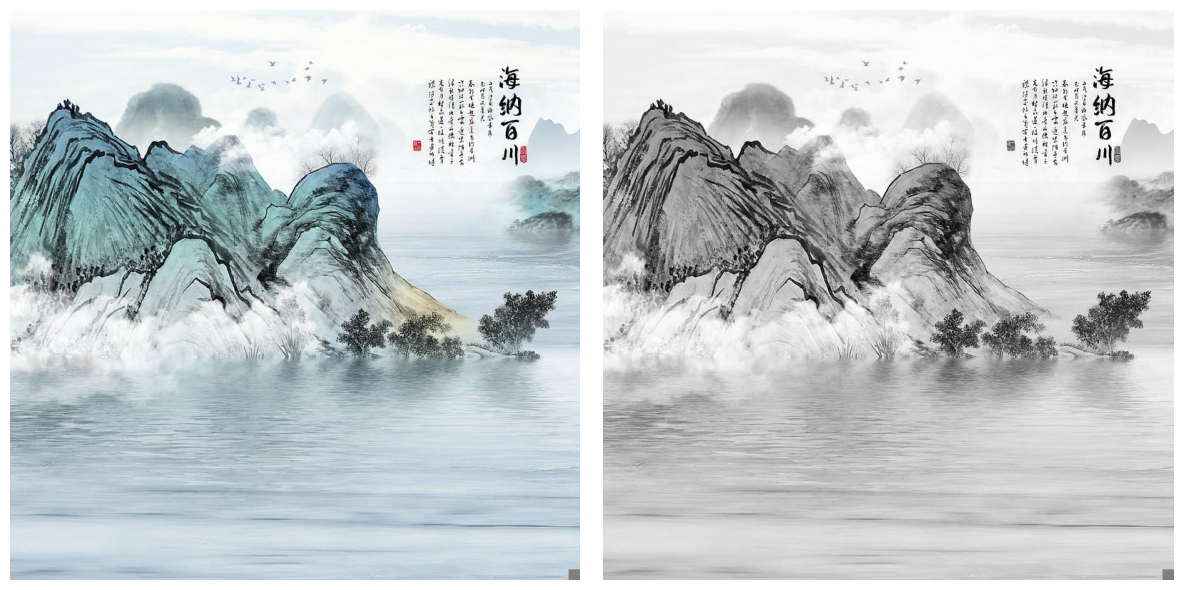

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(CACHE['mountains'].rgb()[:799, :799, :])
plt.axis('off')

plt.subplot(122)
plt.imshow(CACHE['mountains'].gray()[:799, :799], cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
def comp_fft2d(image):
    ft = np.fft.ifftshift(image)
    ft = np.fft.fft2(ft)
    ft = np.fft.fftshift(ft)
    return ft, ft / image.size

In [8]:
gray_fft, norm_gray_fft = comp_fft2d( CACHE['mountains'].gray() )

In [9]:
np.min(np.abs(norm_gray_fft)), np.max(np.abs(norm_gray_fft))

(np.float64(6.6778773518709664e-06), np.float64(196.47653635652858))

In [10]:
np.min(np.log(np.abs(norm_gray_fft))), np.max(np.log(np.abs(norm_gray_fft)))

(np.float64(-11.916710382608628), np.float64(5.280543016324814))

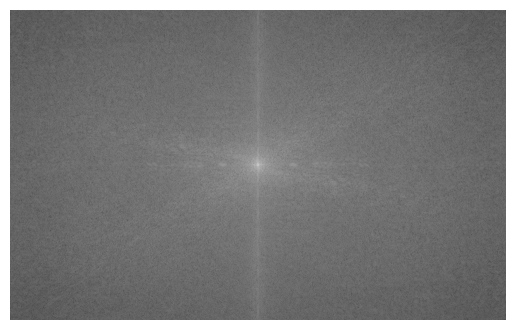

In [11]:
# You display the logarithm of the Fourier transform using np.log()
# as this allows you to see what’s going on better. Without this change,
# the constant term at the centre of the Fourier transform would be so much
# brighter than all the other points that everything else will appear black.
# You’d be “blinded” by this one, central dot.

plt.imshow(np.log(np.abs(norm_gray_fft)), cmap='gray')
plt.axis('off')

plt.show()

In [20]:
# Find the max value.
np.unravel_index( np.argmax(norm_gray_fft), norm_gray_fft.shape ), norm_gray_fft.shape

((np.int64(400), np.int64(639)), (800, 1279))

In [21]:
# Print the max val and its absolute value.
max_val = gray_fft[400, 639]
max_val, np.abs(max_val)

(np.complex128(201034792.00000006-2.736548765369662e-10j),
 np.float64(201034792.00000006))

In [23]:
np.where( np.abs(gray_fft) >= 200e6 )

(array([400]), array([639]))

In [84]:
gray_fft.shape, gray_fft.shape[0]*gray_fft.shape[1]

((800, 1279), 1023200)

In [86]:
# See the total number of elements.
gray_fft.flatten()

array([-3867.17668693 -168.74540432j,  1058.34213108-4346.46034613j,
        1322.73638859-2783.57116907j, ..., -1073.74539349 -521.87006343j,
         156.70897394 +919.23416559j, -4897.48276222+2432.50711756j],
      shape=(1023200,))

In [47]:
# Round down the max value to its order of mangnitue.
magnitude = np.floor( np.log10( np.abs(max_val) ) )
magnitude, 10**magnitude

(np.float64(8.0), np.float64(100000000.0))

In [48]:
# Trying this out again w/ the order of magnitude max val.
np.where( np.abs(gray_fft) >= 10**magnitude )

(array([400]), array([639]))

In [50]:
np.min( np.abs(gray_fft) ), np.min( np.log10(np.abs(gray_fft)) )

(np.float64(6.832804106434372), np.float64(0.8345989698644815))

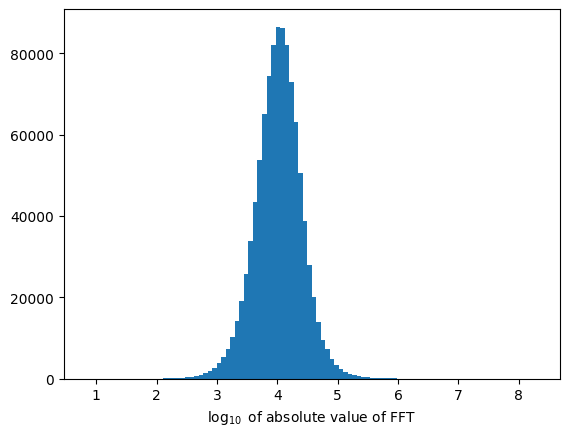

In [55]:
plt.hist( np.log10(np.abs(gray_fft.flatten())), bins=100 )
plt.xlabel(r'$\log_{10}$ of absolute value of FFT')

plt.show()

In [57]:
fft_result = gray_fft

In [67]:
fft_result.shape[1], fft_result.shape[1] / 2, fft_result.shape[1] // 2

(1279, 639.5, 639)

In [69]:
# This is the number of elements the right hand side should have.
# This count includes the DC elemnt.
1279 - 639

640

In [88]:
# Now let's find the places where there is a significant signal.
np.where( np.abs(fft_result) >= 1.0)

(array([  0,   0,   0, ..., 799, 799, 799], shape=(1023200,)),
 array([   0,    1,    2, ..., 1276, 1277, 1278], shape=(1023200,)))

In [109]:
# See what indices looks like: there are 2 main axis.
# The first one counts like rows - values increase going down.
# The second one counts like columns - values increase going right.
_sample_indices = np.indices((3,6))
_sample_indices, _sample_indices.shape, _sample_indices[1]

(array([[[0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1],
         [2, 2, 2, 2, 2, 2]],
 
        [[0, 1, 2, 3, 4, 5],
         [0, 1, 2, 3, 4, 5],
         [0, 1, 2, 3, 4, 5]]]),
 (2, 3, 6),
 array([[0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5]]))

In [105]:
# Pick the indices greater than 3.
np.where( _sample_indices[1] >= 3 )

(array([0, 0, 0, 1, 1, 1]), array([3, 4, 5, 3, 4, 5]))

In [114]:
# We can also use np.arange to just create an array of indices up-to the size of a dimension.
np.arange(0, fft_result.shape[1]).shape

(1279,)

In [115]:
# If 2D array is MxN, get the indices where the x-coordinate is >= N/2.
# np.indices(shape)[1] pickes out the indices matching the columns, i.e., [0, 1, 2, ...].
# We could do (np.indices(fft_result.shape)[1] >= N/2)) but using np.arange is simpler.
mid_width = fft_result.shape[1] // 2
indices = np.where(
    (np.abs(fft_result) >= 1.0) & (np.arange(0, fft_result.shape[1]) >= mid_width)
)

In [113]:
indices

(array([  0,   0,   0, ..., 799, 799, 799], shape=(512000,)),
 array([ 639,  640,  641, ..., 1276, 1277, 1278], shape=(512000,)))

In [116]:
height = fft_result.shape[0]
width = fft_result.shape[1]
centre_x, centre_y = width//2,  height//2

mid_width = fft_result.shape[1] // 2
indices = np.where(
    (np.abs(fft_result) >= 1.0) & (np.arange(0, fft_result.shape[1]) >= mid_width)
)

# Calculate distance from center for each point.
y_coords, x_coords = indices
distances = np.sqrt( np.square(x_coords - centre_x) + np.square(y_coords - centre_y) )

# Sort by distance.
sort_order = np.argsort(distances)

# Apply sorting to coordinates.
sorted_indices = (y_coords[sort_order], x_coords[sort_order])

# Get corresponding FFT values if needed.
sorted_values = fft_result[sorted_indices]

In [117]:
sorted_values

array([ 2.01034792e+08-2.73654877e-10j, -1.30962094e+07+4.91327942e+06j,
        4.14563328e+06-1.14534975e+06j, ...,
       -4.50831246e+03-2.03052483e+03j, -4.89748276e+03+2.43250712e+03j,
       -3.86717669e+03+1.68745404e+02j], shape=(512000,))

In [118]:
np.abs(sorted_values)

array([2.01034792e+08, 1.39875307e+07, 4.30094191e+06, ...,
       4.94448302e+03, 5.46831128e+03, 3.87085656e+03], shape=(512000,))

In [120]:
sorted_values.shape

(512000,)

In [123]:
sorted_indices

(array([400, 399, 400, ...,   1, 799,   0], shape=(512000,)),
 array([ 639,  639,  640, ..., 1278, 1278, 1278], shape=(512000,)))

In [124]:
np.column_stack(sorted_indices)

array([[ 400,  639],
       [ 399,  639],
       [ 400,  640],
       ...,
       [   1, 1278],
       [ 799, 1278],
       [   0, 1278]], shape=(512000, 2))

In [121]:
from IPython.display import Video

In [273]:
def get_conjugate_coord(y, x, height, width):
    centre_y = height // 2
    centre_x = width // 2

    diff_y = abs(y - centre_y)
    if y == 0:
        conj_y = height - 1
    elif y < centre_y:
        conj_y = centre_y + diff_y
    elif y > centre_y:
        conj_y = centre_y - diff_y
    else:
        conj_y = y

    diff_x = abs(x - centre_x)
    if x == 0:
        conj_x = width - 1
    if x < centre_x:
        conj_x = centre_x + diff_x
    elif x > centre_x:
        conj_x = centre_x - diff_x
    else:
        conj_x = x
    
    #conj_y = height - y
    #if conj_y % 2 == 0:
    #    conj_y -= 1
    #conj_x = width - x - 1
    #if conj_x % 2 == 0:
    #    conj_x -= 1
    return conj_y, conj_x

def comp_2dift(ft_input):
    ift = np.fft.ifftshift(ft_input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

In [256]:
# Setup video writer
rec_path = './rec.mp4'
fps = 90
out = cv.VideoWriter(
    rec_path,
    cv.VideoWriter_fourcc(*'avc1'),  # or 'H264' - this is H.264 codec
    fps,
    (fft_result.shape[1], fft_result.shape[0]),
)

fft_result = gray_fft
rec_image = np.zeros(fft_result.shape)
individual_grating = np.zeros(fft_result.shape, dtype=complex)
idx = 0
for y, x in tqdm(np.column_stack(sorted_indices)[:2_000]):
    idx += 1

    # Add frequency and its conjugate.
    individual_grating.fill(0)
    individual_grating[y, x] = fft_result[y, x]
       
    # Get conjugate coordinates.
    conj_y, conj_x = get_conjugate_coord(y, x, height, width)
    individual_grating[conj_y, conj_x] = fft_result[conj_y, conj_x]

    _val      = np.abs( individual_grating[y,      x]           )
    _val_conj = np.abs( individual_grating[conj_y, conj_x] )
    if not np.isclose(_val, _val_conj, atol=0.1):
        raise ValueError(f'value: {_val:0.2f}. Conjugate: {_val_conj:0.2f}. Indices: {y}, {x}. Conjugate indices {conj_y}, {conj_x}')
   
    # IFFT and accumulate.
    grating = comp_2dift(individual_grating)
    rec_image += grating
       
    # Normalize to [0, 255] for video.
    vis_image = cv.normalize(rec_image, None, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_8U)
    vis_image = cv.cvtColor(vis_image, cv.COLOR_GRAY2BGR)
    out.write(vis_image)
    #print("Shape of vis_image:", vis_image.shape)
    #print("Data type of vis_image:", vis_image.dtype)
    #print("Min/max values:", vis_image.min(), vis_image.max())

   
out.release()

  0%|          | 0/2000 [00:00<?, ?it/s]

In [257]:
Video(url=rec_path, width=500, height=300)

grating: [-4510604.62549073-2974540.88988169j -4510604.62549073+2974540.88988169j
        0.              +0.j        ]


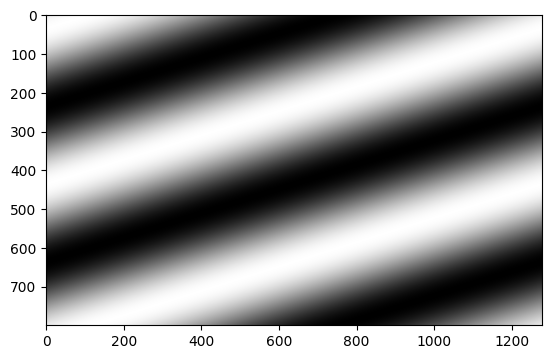

In [258]:
def plot_freqs(idx, fft_result, height, width):
    rec_image = np.zeros(fft_result.shape)
    individual_grating = np.zeros(fft_result.shape, dtype=complex)
    y, x = np.column_stack(sorted_indices)[idx]
    
    individual_grating.fill(0)
    individual_grating[y, x] = fft_result[y, x]
           
    # Get conjugate coordinates.
    conj_y, conj_x = get_conjugate_coord(y, x, height, width)
    individual_grating[conj_y, conj_x] = fft_result[conj_y, conj_x]
    print(f'grating: {np.unique(individual_grating)}')

    _val      = np.abs( individual_grating[y,      x]           )
    _val_conj = np.abs( individual_grating[conj_y, conj_x] )
    if not np.isclose(_val, _val_conj, atol=0.1):
        raise ValueError(f'value: {_val:0.2f}. Conjugate: {_val_conj:0.2f}. Indices: {y}, {x}. Conjugate indices {conj_y}, {conj_x}')
   
           
    # IFFT and accumulate.
    grating = comp_2dift(individual_grating)
    #ec_image += grating
           
    # Normalize to [0, 255] for video.
    vis_image = cv.normalize(grating, None, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_8U)
    #vis_image = cv.cvtColor(vis_image, cv.COLOR_GRAY2BGR)

    plt.imshow(vis_image, cmap='gray')
    plt.show()

plot_freqs(11, fft_result, fft_result.shape[0], fft_result.shape[1])

In [259]:
def get_sorted_coordinates(fft_result, threshold=1.0):
    height = fft_result.shape[0]
    width = fft_result.shape[1]
    centre_x, centre_y = width//2,  height//2
    
    mid_width = fft_result.shape[1] // 2
    indices = np.where(
        (np.abs(fft_result) >= threshold) & (np.arange(0, fft_result.shape[1]) >= mid_width)
    )
    
    # Calculate distance from center for each point.
    y_coords, x_coords = indices
    distances = np.sqrt( np.square(x_coords - centre_x) + np.square(y_coords - centre_y) )
    
    # Sort by distance.
    sort_order = np.argsort(distances)
    
    # Apply sorting to coordinates.
    sorted_indices = (y_coords[sort_order], x_coords[sort_order])

    return np.column_stack(sorted_indices)

In [260]:
def process_fft_batched(video_path, fft_result, batch_size=10, max_freqs=10_000):
    """
    Process FFT result in batches for faster computation
    """
    height, width = fft_result.shape
    sorted_coords = get_sorted_coordinates(fft_result)
    
    # Setup video writer
    fps = 100
    out = cv.VideoWriter(
        video_path,
        cv.VideoWriter_fourcc(*'avc1'),
        fps,
        (width, height),
    )
    
    rec_image = np.zeros(fft_result.shape)
    
    # Process in batches.
    idx = 0
    individual_grating = np.zeros(fft_result.shape, dtype=complex)
    for y, x in tqdm(sorted_coords[:max_freqs]):
        idx += 1

        # Add frequency and its conjugate.
        individual_grating[y, x] = fft_result[y, x]
           
        # Get conjugate coordinates.
        conj_y, conj_x = get_conjugate_coord(y, x, height, width)
        #print(f'{y}, {x} ->{conj_y}, {conj_x}')
        individual_grating[conj_y, conj_x] = fft_result[conj_y, conj_x]

        _val      = np.abs( individual_grating[y,      x]           )
        _val_conj = np.abs( individual_grating[conj_y, conj_x] )
        if not np.isclose(_val, _val_conj, atol=0.1):
            raise ValueError(f'value: {_val:0.2f}. Conjugate: {_val_conj:0.2f}. Indices: {y}, {x}. Conjugate indices {conj_y}, {conj_x}')
   
        if idx >= batch_size:
            # IFFT and accumulate.
            grating = comp_2dift(individual_grating)
            rec_image += grating
               
            # Normalize to [0, 255] for video.
            vis_image = cv.normalize(rec_image, None, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_8U)
            vis_image = cv.cvtColor(vis_image, cv.COLOR_GRAY2BGR)
            out.write(vis_image)

            idx = 0
            individual_grating.fill(0)

    out.release()
    return

In [261]:
def process_fft_threshold(video_path, fft_result, batch_size=10, threshold=1.0, max_freqs=10_000):
    height, width = fft_result.shape
    sorted_coords = get_sorted_coordinates(fft_result, threshold=threshold)
    print(f'frequencies elected: {sorted_coords.size}')
    
    # Setup video writer
    fps = 100
    out = cv.VideoWriter(
        video_path,
        cv.VideoWriter_fourcc(*'avc1'),
        fps,
        (width, height),
    )
    
    rec_image = np.zeros(fft_result.shape)
    
    # Process in batches.
    idx = 0
    individual_grating = np.zeros(fft_result.shape, dtype=complex)
    for y, x in tqdm(sorted_coords[:max_freqs]):
        idx += 1
        
        # Add frequency and its conjugate.
        individual_grating[y, x] = fft_result[y, x]
           
        # Get conjugate coordinates.
        conj_y, conj_x = get_conjugate_coord(y, x, height, width)
        #print(f'{y}, {x} ->{conj_y}, {conj_x}')
        individual_grating[conj_y, conj_x] = fft_result[conj_y, conj_x]

        _val      = np.abs( individual_grating[y,      x]           )
        _val_conj = np.abs( individual_grating[conj_y, conj_x] )
        if not np.isclose(_val, _val_conj, atol=0.1):
            raise ValueError(f'value: {_val:0.2f}. Conjugate: {_val_conj:0.2f}. Indices: {y}, {x}. Conjugate indices {conj_y}, {conj_x}')

        if idx >= batch_size:
            # IFFT and accumulate.
            grating = comp_2dift(individual_grating)
            rec_image += grating
               
            # Normalize to [0, 255] for video.
            vis_image = cv.normalize(rec_image, None, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_8U)
            vis_image = cv.cvtColor(vis_image, cv.COLOR_GRAY2BGR)
            out.write(vis_image)

            idx = 0
            individual_grating.fill(0)

    out.release()
    return

In [262]:
process_fft_batched('./gray-batches.mp4', fft_result, batch_size=200, max_freqs=200_000)

  0%|          | 0/200000 [00:00<?, ?it/s]

In [263]:
Video(url='./gray-batches.mp4', width=500, height=300)

In [264]:
get_sorted_coordinates(fft_result, threshold=100).shape

(511954, 2)

In [265]:
get_sorted_coordinates(fft_result, threshold=1000).shape

(507365, 2)

In [266]:
process_fft_threshold('./gray-thresh.mp4', fft_result, batch_size=200, max_freqs=200_000, threshold=1000)

frequencies elected: 1014730


  0%|          | 0/200000 [00:00<?, ?it/s]

In [267]:
Video(url='./gray-thresh.mp4', width=500, height=300)

In [382]:
def reconstruct_color_img(b_fft, g_fft, r_fft, batch_size=10, max_freqs=10_000, video_path='./video.mp4'):
    """
    Process FFT result in batches for faster computation
    """
    height = b_fft.shape[0]
    width = b_fft.shape[1]
    b_sorted_coords = get_sorted_coordinates(b_fft, threshold=1.0)
    g_sorted_coords = get_sorted_coordinates(g_fft, threshold=1.0)
    r_sorted_coords = get_sorted_coordinates(r_fft, threshold=1.0)

    max_len = max( b_sorted_coords.shape[0], g_sorted_coords.shape[0], r_sorted_coords.shape[0] )
    if max_freqs > 0:
        max_len = min(max_len, max_freqs)
    print(f'using max len: {max_len:_}')
    
    # Setup video writer
    fps = 50
    out = cv.VideoWriter(
        video_path,
        cv.VideoWriter_fourcc(*'avc1'),
        fps,
        (width, height),
        isColor=True,
    )
    
    # Initialize reconstruction images for each channel
    rec_b = np.zeros(b_fft.shape, dtype=np.float32)
    rec_g = np.zeros(g_fft.shape, dtype=np.float32)
    rec_r = np.zeros(r_fft.shape, dtype=np.float32)
    
    # Initialize gratings for each channel
    b_grating = np.zeros(b_fft.shape, dtype=complex)
    g_grating = np.zeros(g_fft.shape, dtype=complex)
    r_grating = np.zeros(r_fft.shape, dtype=complex)

    
    # Process in batches.
    idx = 0
    for index in tqdm(range(max_len)):
        idx += 1

        b_y, b_x = b_sorted_coords[index]
        g_y, g_x = g_sorted_coords[index]
        r_y, r_x = r_sorted_coords[index]
        
        # Add frequency and its conjugate for each channel.
        b_grating[b_y, b_x] = b_fft[b_y, b_x]
        g_grating[g_y, g_x] = g_fft[g_y, g_x]
        r_grating[r_y, r_x] = r_fft[r_y, r_x]
        
        # Get conjugate coordinates.
        conj_b_y, conj_b_x = _get_conjugate_coord(b_y, b_x, height, width)
        conj_g_y, conj_g_x = _get_conjugate_coord(g_y, g_x, height, width)
        conj_r_y, conj_r_x = _get_conjugate_coord(r_y, r_x, height, width)
        
        # Set conjugates for each channel.
        b_grating[conj_b_y, conj_b_x] = b_fft[conj_b_y, conj_b_x]
        g_grating[conj_g_y, conj_g_x] = g_fft[conj_g_y, conj_g_x]
        r_grating[conj_r_y, conj_r_x] = r_fft[conj_r_y, conj_r_x]

        _val      = np.abs( b_grating[b_y,      b_x] )
        _val_conj = np.abs( b_grating[conj_b_y, conj_b_x] )
        if not np.isclose(_val, _val_conj, atol=0.1):
            raise ValueError(f'blue value: {_val:0.2f}. Conjugate: {_val_conj:0.2f}. Indices: {b_y}, {b_x}. Conjugate indices {conj_b_y}, {conj_b_x}')

        _val      = np.abs( g_grating[g_y,      g_x] )
        _val_conj = np.abs( g_grating[conj_g_y, conj_g_x] )
        if not np.isclose(_val, _val_conj, atol=0.1):
            raise ValueError(f'red value: {_val:0.2f}. Conjugate: {_val_conj:0.2f}. Indices: {g_y}, {g_x}. Conjugate indices {conj_g_y}, {conj_g_x}')

        _val      = np.abs( r_grating[r_y,      r_x] )
        _val_conj = np.abs( r_grating[conj_r_y, conj_r_x] )
        if not np.isclose(_val, _val_conj, atol=0.1):
            raise ValueError(f'red value: {_val:0.2f}. Conjugate: {_val_conj:0.2f}. Indices: {r_y}, {r_x}. Conjugate indices {conj_r_y}, {conj_r_x}')


        if idx >= batch_size:
            # IFFT and accumulate for each channel
            rec_b += comp_2dift(b_grating)
            rec_g += comp_2dift(g_grating)
            rec_r += comp_2dift(r_grating)
            
            # Clear the gratings
            b_grating.fill(0)
            g_grating.fill(0)
            r_grating.fill(0)
            idx = 0

            # Debug prints here
            #print(f"\nAfter adding frequencies:")
            #print(f"Reconstruction means - B:{np.mean(rec_b):.2f} G:{np.mean(rec_g):.2f} R:{np.mean(rec_r):.2f}")
            #print(f"Reconstruction ranges - B:[{np.min(rec_b):.2f}, {np.max(rec_b):.2f}]")
            #print(f"                       G:[{np.min(rec_g):.2f}, {np.max(rec_g):.2f}]")
            #print(f"                       R:[{np.min(rec_r):.2f}, {np.max(rec_r):.2f}]")

                    
            # Normalize and combine channels for video
            vis_b = cv.normalize(rec_b, None, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_8U)
            vis_g = cv.normalize(rec_g, None, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_8U)
            vis_r = cv.normalize(rec_r, None, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_8U)

            
            # Stack channels and write frame
            #vis_image = cv.merge([vis_b, vis_g, vis_r])
            
            ##merged = cv.merge([rec_b, rec_g, rec_r])
            ##vis_image = cv.normalize(merged, None, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_8U)

            # Each channel gets normalized by the global range of the original image
            #max_orig = max(np.max(b), np.max(g), np.max(r))
            #min_orig = min(np.min(b), np.min(g), np.min(r))
            #scale = 255.0 / (max_orig - min_orig)
            
            #vis_b = np.clip((rec_b - min_orig) * scale, 0, 255).astype(np.uint8)
            #vis_g = np.clip((rec_g - min_orig) * scale, 0, 255).astype(np.uint8)
            #vis_r = np.clip((rec_r - min_orig) * scale, 0, 255).astype(np.uint8)
            
            vis_image = cv.merge([vis_b, vis_g, vis_r])  # Back to BGR
            #out.write(cv.cvtColor(vis_image, cv.COLOR_BGR2RGB))
            #vis_image = cv.merge([vis_r, vis_g, vis_b])
            out.write(vis_image)

            final_b, final_g, final_r = cv.split(vis_image)
            #print(f"Final means - B:{np.mean(final_b):.2f} G:{np.mean(final_g):.2f} R:{np.mean(final_r):.2f}")

    out.release()
    return

In [383]:
b, g, r = cv.split(CACHE['mountains'].img)

# Compute FFT for each channel.
b_fft, _ = comp_fft2d(b.astype(np.float32))
g_fft, _ = comp_fft2d(g.astype(np.float32))
r_fft, _ = comp_fft2d(r.astype(np.float32))

print("\nOriginal image means:")
print(f"Blue: {np.mean(b):.2f}")
print(f"Green: {np.mean(g):.2f}")
print(f"Red: {np.mean(r):.2f}")

print("FFT magnitude ranges:")
print(f"Blue channel: {np.min(np.abs(b_fft)):.2f} to {np.max(np.abs(b_fft)):.2f}")
print(f"Green channel: {np.min(np.abs(g_fft)):.2f} to {np.max(np.abs(g_fft)):.2f}")
print(f"Red channel: {np.min(np.abs(r_fft)):.2f} to {np.max(np.abs(r_fft)):.2f}")

print("\nBefore reconstruction:")
print(f"Original means - B:{np.mean(b):.2f} G:{np.mean(g):.2f} R:{np.mean(r):.2f}")


reconstruct_color_img(b_fft, g_fft, r_fft, batch_size=1000, max_freqs=200_000, video_path='./rec-with-colour.mp4')


Original image means:
Blue: 204.96
Green: 199.81
Red: 186.67
FFT magnitude ranges:
Blue channel: 18.74 to 209713776.00
Green channel: 17.48 to 204446640.00
Red channel: 7.64 to 191000304.00

Before reconstruction:
Original means - B:204.96 G:199.81 R:186.67
using max len: 200_000


  0%|          | 0/200000 [00:00<?, ?it/s]

In [384]:
Video(url='./rec-with-colour.mp4', width=1000, height=300)

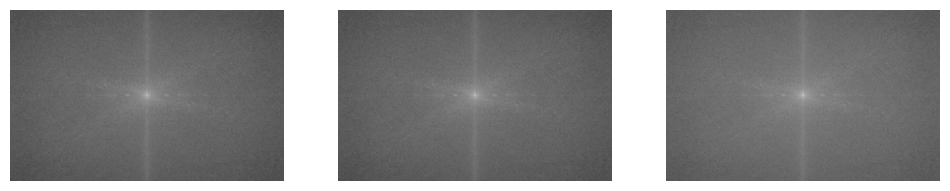

In [385]:
plt.figure(figsize=(12,8))

plt.subplot(131)
plt.imshow(np.log(np.abs(b_fft)), cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.imshow(np.log(np.abs(g_fft)), cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.imshow(np.log(np.abs(r_fft)), cmap='gray')
plt.axis('off')

plt.show()

In [386]:
# Compute FFT for each channel
b_fft, _ = comp_fft2d(b.astype(np.float32))
g_fft, _ = comp_fft2d(g.astype(np.float32))
r_fft, _ = comp_fft2d(r.astype(np.float32))


reconstruct_color_img(b_fft, g_fft, r_fft, batch_size=1000, max_freqs=-1, video_path='./rec-with-all-colours.mp4')

using max len: 512_000


  0%|          | 0/512000 [00:00<?, ?it/s]

In [388]:
Video(url='../rec-with-all-colours.mp4', width=600, height=300)

In [331]:
"""
The even/odd dimensions create different symmetry patterns in the FFT.

For even dimensions (like height=800):
- The frequency components go from 0 to N/2-1, then -N/2 to -1
- In the array indices, this maps to 0 to N/2-1, then N/2 to N-1
- The center (DC component) is at N/2
- Perfect symmetry around this center point

For odd dimensions (like width=1279):
- The frequency components go from 0 to (N-1)/2, then -(N-1)/2 to -1
- In array indices, this maps to 0 to (N-1)/2, then (N+1)/2 to N-1
- The center (DC component) is at (N-1)/2
- The symmetry needs to account for this slightly offset center

This is why we needed that `2 * centre_x - x` formula for the odd width -
it ensures we get points equidistant from the center frequency, while the simpler modulo
arithmetic works fine for the even height.
"""
def _get_conjugate_coord(y, x, height, width):
    centre_x = width // 2  # 639 for width=1279
    
    # If we're at the center frequency, return same point
    if x == centre_x:
        conj_x = x
    else:
        # The conjugate x is on the opposite side of the center
        conj_x = 2 * centre_x - x
        
    # For height, still use the same logic as before
    conj_y = (height - y) % height
    
    return conj_y, conj_x

In [310]:
conj_b_y, conj_b_x = get_conjugate_coord(0, 641, b_fft.shape[0], b_fft.shape[1])

In [311]:
b_fft[0, 641], np.abs(b_fft[0, 641])

(np.complex64(-1166.2007-3333.2644j), np.float32(3531.3843))

In [312]:
b_fft[799, 637], np.abs(b_fft[799, 637])

(np.complex64(14472.478+5966.3716j), np.float32(15654.08))

In [313]:
b_fft[conj_b_y, conj_b_x], conj_b_y, conj_b_x

(np.complex64(14472.478+5966.3716j), 799, 637)

In [314]:
np.where(b_fft == -1166.2007-3333.2644j)

(array([0]), array([641]))

In [315]:
np.where( np.isclose(np.abs(b_fft), 3531, atol=1) )

(array([  0,   0,   3,   4,  10,  10,  15,  22,  26,  27,  32,  35,  44,
         44,  44,  44,  46,  47,  47,  54,  58,  60,  64,  69,  69,  71,
         73,  74,  83,  85,  91, 103, 107, 121, 122, 129, 132, 146, 155,
        160, 170, 181, 185, 198, 207, 207, 216, 226, 235, 256, 271, 273,
        288, 292, 351, 377, 378, 422, 423, 449, 508, 512, 527, 529, 544,
        565, 574, 584, 593, 593, 602, 615, 619, 630, 640, 645, 654, 668,
        671, 678, 679, 693, 697, 709, 715, 717, 726, 727, 729, 731, 731,
        736, 740, 742, 746, 753, 753, 754, 756, 756, 756, 756, 765, 768,
        773, 774, 778, 785, 790, 790, 796, 797]),
 array([ 637,  641, 1246,  136, 1072, 1186,  772,  886,  998, 1153,  163,
        1277,   33,   90,  415,  505,  972,  963, 1112,  315,  615,   93,
        1258, 1052, 1273, 1184, 1209, 1081,    6,  665,   33,   35,  211,
         270, 1203, 1145, 1214,  143,  950, 1217, 1206,  205,  166,  187,
        1235, 1256,  292, 1245,  113,    9, 1054,   89,  679,  421,   

In [324]:
b_fft[0, 637], np.abs(b_fft[0, 637])

(np.complex64(-1166.2007+3333.2644j), np.float32(3531.3843))

In [316]:
np.sort(np.where( np.isclose(np.abs(b_fft), 3531, atol=1) )[0])

array([  0,   0,   3,   4,  10,  10,  15,  22,  26,  27,  32,  35,  44,
        44,  44,  44,  46,  47,  47,  54,  58,  60,  64,  69,  69,  71,
        73,  74,  83,  85,  91, 103, 107, 121, 122, 129, 132, 146, 155,
       160, 170, 181, 185, 198, 207, 207, 216, 226, 235, 256, 271, 273,
       288, 292, 351, 377, 378, 422, 423, 449, 508, 512, 527, 529, 544,
       565, 574, 584, 593, 593, 602, 615, 619, 630, 640, 645, 654, 668,
       671, 678, 679, 693, 697, 709, 715, 717, 726, 727, 729, 731, 731,
       736, 740, 742, 746, 753, 753, 754, 756, 756, 756, 756, 765, 768,
       773, 774, 778, 785, 790, 790, 796, 797])

In [318]:
b_fft.shape

(800, 1279)

In [327]:
print(f"Original point value: {b_fft[0, 641]}")
conj_y, conj_x = _get_conjugate_coord(0, 641, 800, 1279)
print(f"Conjugate point value: {np.conj(b_fft[conj_y, conj_x])}")
print(f"Conjugate coordinates: {conj_y}, {conj_x}")

Original point value: (-1166.20068359375-3333.264404296875j)
Conjugate point value: (-1166.20068359375-3333.264404296875j)
Conjugate coordinates: 0, 637


In [325]:
for x in range(636, 643):
    print(f"Value at (0, {x}): {b_fft[0, x]}")

Value at (0, 636): (-1513.448486328125-1175.2354736328125j)
Value at (0, 637): (-1166.20068359375+3333.264404296875j)
Value at (0, 638): (-11591.72265625-7489.61669921875j)
Value at (0, 639): (-1579+7.457856554538012e-11j)
Value at (0, 640): (-11591.72265625+7489.61669921875j)
Value at (0, 641): (-1166.20068359375-3333.264404296875j)
Value at (0, 642): (-1513.448486328125+1175.2354736328125j)
